<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/lesson_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
# import tsfresh

In [27]:
X, y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=100)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

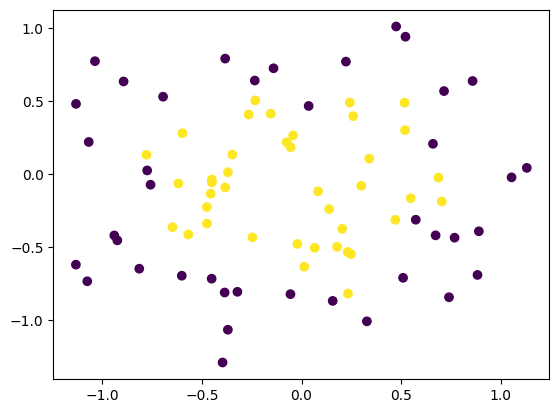

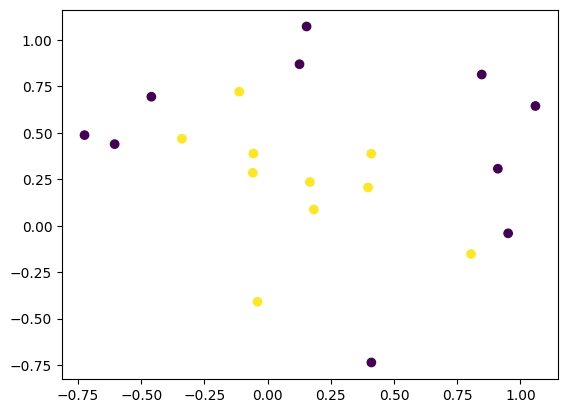

In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [53]:
# model = DecisionTreeClassifier(max_depth=3)
# model = RandomForestClassifier(n_estimators=10)
# model = xgboost.XGBClassifier(n_estimators=10)
model = lightgbm.LGBMClassifier(n_estimators=10, num_leaves=16)

In [51]:
model.fit(X_train, y_train)

LGBMClassifier(num_leaves=16)

In [32]:
model.feature_importances_

array([0.45825068, 0.54174932])

In [ ]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx, yy

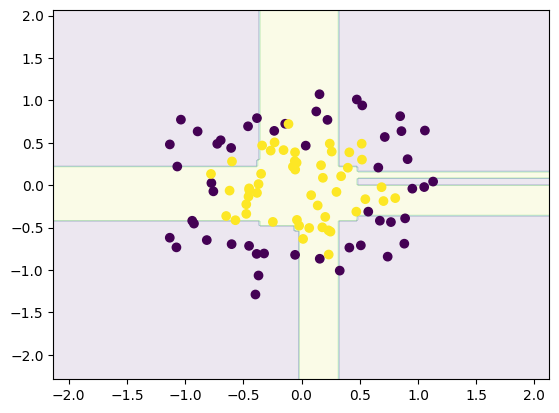

In [52]:
for clf in [model]:
    h = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    h = h.reshape(xx.shape)

    plt.contourf(xx, yy, h, alpha=0.1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    plt.show()

In [ ]:
f1_score(y_train, model.predict(X_train)), f1_score(y_test, model.predict(X_test))

In [ ]:
df = pd.read_csv("data/idle/idle-1.csv")

In [ ]:
pd.DataFrame(
    {
        "mean_acc_X": [df["accelerometer_X"].mean()],
        "mean_acc_Y": [df["accelerometer_Y"].mean()],
        "mean_acc_Z": [df["accelerometer_Z"].mean()],

        "kurtosis_acc_X": [df["accelerometer_X"].kurtosis()],
    }
)

In [ ]:
df[["accelerometer_X"]].T

In [ ]:
df_1 = pd.read_csv("data/idle/idle-1.csv")
df_2 = pd.read_csv("data/idle/idle-2.csv")
df_3 = pd.read_csv("data/idle/idle-3.csv")

In [ ]:
df_1["id"] = 0
df_2["id"] = 1
df_3["id"] = 2

In [ ]:
df = pd.concat([df_1, df_2, df_3]).reset_index(drop=True)
df

In [ ]:
df.groupby("id")["accelerometer_X"].sum()

In [ ]:
df_features = tsfresh.extract_features(df, column_id='id')

In [ ]:
df_features.dropna(axis=1)

In [ ]:
df_features["accelerometer_X__sum_values"]

In [ ]:
for x in df_features.dropna(axis=1).columns:
    print(x)

In [ ]:
idle  :  1039
running  :  3408
stairs  :  165
walking  :  1850

In [ ]:
y = [0] * 1039 + [1] * 3408 + [2] * 165 + [3] * 1850

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train, y_test = train_test_split(y, test_size=0.2, stratify=y)

In [ ]:
import collections

In [ ]:
d1 = collections.Counter(y_train)
d2 = collections.Counter(y_test)
d1, d2

In [ ]:
for k in d1.keys():
    print(k, d1[k], d2[k], d2[k] / (d1[k] + d2[k]))